# 2. Linear Regression
inspiration: https://en.wikipedia.org/wiki/Polynomial_regression

$$
{\displaystyle y_{i}\,=\,\beta _{0}+\beta _{1}x_{i}+\beta _{2}x_{i}^{2}+\cdots +\beta _{m}x_{i}^{m}+\varepsilon _{i}\ (i=1,2,\dots ,n)}
$$
This is the Polynomail Regression Model matrix interpretation:

$$
{\displaystyle {\begin{bmatrix}y_{1}\\y_{2}\\y_{3}\\\vdots \\y_{n}\end{bmatrix}}={\begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{m}\\1&x_{2}&x_{2}^{2}&\dots &x_{2}^{m}\\1&x_{3}&x_{3}^{2}&\dots &x_{3}^{m}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x_{n}&x_{n}^{2}&\dots &x_{n}^{m}\end{bmatrix}}{\begin{bmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\vdots \\\beta _{m}\end{bmatrix}}+{\begin{bmatrix}\varepsilon _{1}\\\varepsilon _{2}\\\varepsilon _{3}\\\vdots \\\varepsilon _{n}\end{bmatrix}}}
$$

in which its pure matrix notation as:

$$
{\displaystyle {\vec {y}}=\mathbf {X} {\vec {\beta }}+{\vec {\varepsilon }}.\,}
$$

the vector of **estimated** polynomial regression coefficients (with least squares estimation):

$$
{\displaystyle {\widehat {\vec {\beta }}}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\;\mathbf {X} ^{\mathsf {T}}{\vec {y}},\,}
$$

This is also its expanded formula:

$$
{\displaystyle {\begin{bmatrix}\sum _{i=1}^{n}x_{i}^{0}&\sum _{i=1}^{n}x_{i}^{1}&\sum _{i=1}^{n}x_{i}^{2}&\cdots &\sum _{i=1}^{n}x_{i}^{m}\\\sum _{i=1}^{n}x_{i}^{1}&\sum _{i=1}^{n}x_{i}^{2}&\sum _{i=1}^{n}x_{i}^{3}&\cdots &\sum _{i=1}^{n}x_{i}^{m+1}\\\sum _{i=1}^{n}x_{i}^{2}&\sum _{i=1}^{n}x_{i}^{3}&\sum _{i=1}^{n}x_{i}^{4}&\cdots &\sum _{i=1}^{n}x_{i}^{m+2}\\\vdots &\vdots &\vdots &\ddots &\vdots \\\sum _{i=1}^{n}x_{i}^{m}&\sum _{i=1}^{n}x_{i}^{m+1}&\sum _{i=1}^{n}x_{i}^{m+2}&\dots &\sum _{i=1}^{n}x_{i}^{2m}\\\end{bmatrix}}{\begin{bmatrix}\beta _{0}\\\beta _{1}\\\beta _{2}\\\cdots \\\beta _{m}\\\end{bmatrix}}={\begin{bmatrix}\sum _{i=1}^{n}y_{i}x_{i}^{0}\\\sum _{i=1}^{n}y_{i}x_{i}^{1}\\\sum _{i=1}^{n}y_{i}x_{i}^{2}\\\cdots \\\sum _{i=1}^{n}y_{i}x_{i}^{m}\\\end{bmatrix}}}
$$

as to physically implement with x, y pairs, more details is needed.

After solving the above system of linear equations for 
β
0
 through 
β
m
{\displaystyle \beta _{0}{\text{ through }}\beta _{m}}, the regression polynomial may be constructed as follows

$$
{\displaystyle {\begin{aligned}&\qquad {\widehat {y}}=\beta _{0}x^{0}+\beta _{1}x^{1}+\beta _{2}x^{2}+\cdots +\beta _{m}x^{m}\\&\qquad \\&\qquad {\text{Where:}}\\&\qquad n={\text{number of }}x_{i}y_{i}{\text{ variable pairs in the data}}\\&\qquad m={\text{order of the polynomial to be used for regression}}\\&\qquad \beta _{(0-m)}={\text{polynomial coefficient for each corresponding }}x^{(0-m)}\\&\qquad {\widehat {y}}={\text{estimated y variable based on the polynomial regression calculations.}}\end{aligned}}}
$$



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
def function(x):
  return 0.1*x**3 + 2*x**2 + 7*x +4


def generate_dataset(x_min=-15, x_max=2, size=20, random_state=42):
  rng = np.random.RandomState(random_state)
  x = rng.uniform(low=x_min, high = x_max, size=size)
  y = np.array([function(xi) for xi in x])+2+2*rng.randn(size)

  return(x,y)
  
generate_dataset()

(array([ -8.63281798,   1.16214321,  -2.55610299,  -4.82280577,
        -12.34768311, -12.34809315, -14.01257859,  -0.27500552,
         -4.7810448 ,  -2.96276618, -14.6500636 ,   1.48846749,
         -0.84847511, -11.39023512, -11.90897556, -11.88212333,
         -9.82788187,  -6.07914066,  -7.65693468, -10.04910462]),
 array([28.25915686, 17.62160717, -2.31151552,  4.71707957, 39.1687781 ,
        35.7845545 , 25.61143791,  1.37464124,  6.23200134,  0.43773754,
        15.97023714, 21.93151461,  0.23813432, 37.38586597, 36.18365925,
        41.14181697, 35.4275364 , 12.77645333, 26.41227113, 33.70320345]))

In [3]:
def plot_regression(x_train, y_train,
                    x_test, y_test,
                    x_true, y_true,
                    model, model_label, title):
    y_predict = model.predict(x_true.reshape(-1, 1))
    MSE_train = mse(y_train, model.predict(x_train.reshape(-1, 1)))
    MSE_test = mse(y_test, model.predict(x_test.reshape(-1, 1)))
    plt.figure(figsize=(10, 6))
    plt.scatter(x_train, y_train, label="Train Data")
    plt.scatter(x_test, y_test, color='g', label="Test Data")
    plt.plot(x_true, y_predict, 'r', label=model_label)
    plt.plot(x_true, y_true, label='Actual Function')
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.legend(loc='lower left', fontsize=14)
    plt.title(title +
              "\nTraining MSE = {:.2f}".format(MSE_train) +
              "\nTesting MSE = {:.2f}".format(MSE_test), fontsize=16)
    plt.ylim(-7, 42)

In [4]:
def polynomial_regression(degree=1):
    return Pipeline([
        ("polynomial", PolynomialFeatures(degree)),
        ("scaling", StandardScaler()),
        ("linear", LinearRegression())])

'''
so this is the plan, first, using preprocessing alter the shape of the vector
by using Polynomial Features to change the vector into a Polynomial shape

In tandem, we can use StandardScaler preprocessing in order to help the model to
certain erroneous data or out of range data.

And then insert the data into the LinearRegression model. And the LinearRegression
model will then turn into the Polynomial Regression by PolynomialFeature upthere,

That also explains why PolynomialFeatures to be in the preprocessing module instead
of the linear_module
'''

'\nso this is the plan, first, using preprocessing alter the shape of the vector\nby using Polynomial Features to change the vector into a Polynomial shape\n\nIn tandem, we can use StandardScaler preprocessing in order to help the model to\ncertain erroneous data or out of range data.\n\nAnd then insert the data into the LinearRegression model. And the LinearRegression\nmodel will then turn into the Polynomial Regression by PolynomialFeature upthere,\n\nThat also explains why PolynomialFeatures to be in the preprocessing module instead\nof the linear_module\n'

In [5]:
def polynomial_Ridge_regression(degree=1, alpha=1.0):

    return Pipeline([
        ("polynomial",PolynomialFeatures(degree)),
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha))])
'''
just like before, but this emphasis on the alteration of the shape of the vector

the degree meaning the greatest zero the Feature is, like the largest x^n

the linear_model Ridge is actually a technique in ML used to address overfitting in
linear models, particularly dealing with high correlation between independent variables
which based on alpha.
'''

'\njust like before, but this emphasis on the alteration of the shape of the vector\n\nthe degree meaning the greatest zero the Feature is, like the largest x^n\n\nthe linear_model Ridge is actually a technique in ML used to address overfitting in\nlinear models, particularly dealing with high correlation between independent variables\nwhich based on alpha.\n'

In [6]:
def polynomial_Lasso_regression(degree=1, alpha=1.0):

    return Pipeline([
        ("polynomial",PolynomialFeatures(degree)),
        ("scaler", StandardScaler()),
        ("lasso", Lasso(alpha))])
'''
just like before, but this emphasis on the alteration of the shape of the vector

the degree meaning the greatest zero the Feature is, like the largest x^n

the linear_model Ridge is actually a technique in ML used to address overfitting in
linear models, particularly dealing with high correlation between independent variables
which based on alpha.
'''

'\njust like before, but this emphasis on the alteration of the shape of the vector\n\nthe degree meaning the greatest zero the Feature is, like the largest x^n\n\nthe linear_model Ridge is actually a technique in ML used to address overfitting in\nlinear models, particularly dealing with high correlation between independent variables\nwhich based on alpha.\n'

In [7]:
def train_test_mse(x_train, y_train,
                   x_test, y_test,
                   model):
    MSE_train = mse(y_train, model.predict(x_train.reshape(-1, 1)))
    MSE_test = mse(y_test, model.predict(x_test.reshape(-1, 1)))

    return (MSE_train, MSE_test)

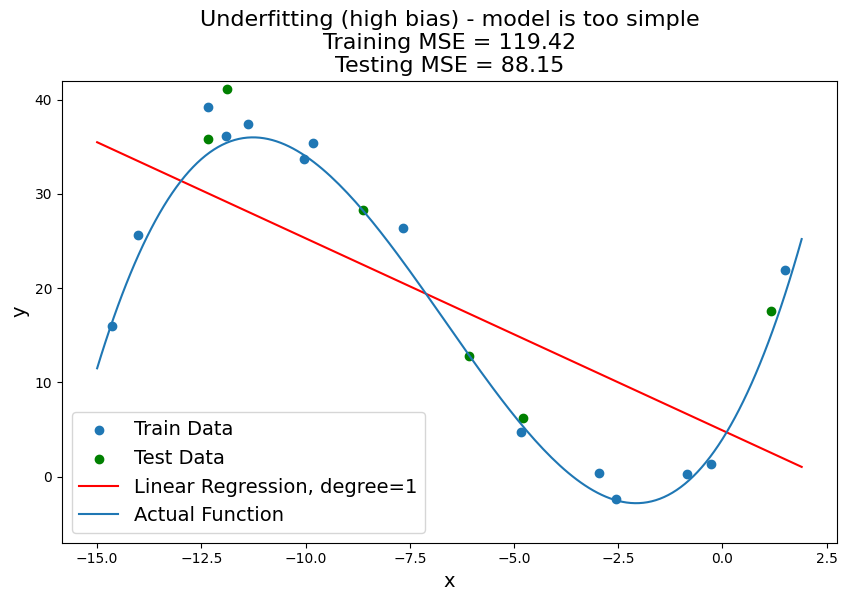

In [8]:
x, y = generate_dataset(x_min=-15, x_max=2, size = 20) #since it returns (x,y)
x_min=-15
x_max=2
x_true = np.arange(x_min, x_max, step=0.1)
y_true = np.array([function(xi) for xi in x_true])


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)
#since using the function train_test_split means that spliting the existing data
#into 80/20 sector, which x,y_train = 80%, x,y_test = 20%
#this function will give a result of (x_train, x_test, y_train, y_test) => can
#have those variables like that too
#0.3 means 30% of the data will go to the test set, and the remaining 70% to the training set.
#Using the same random_state every time (like 42) ensures reproducibility. That means you'll get the same split every time you run the code.
simple_degree = 1 # Polynomial stage of 1|

simple_model = polynomial_regression(degree=simple_degree) #inside the polynomial
#function already have the methods that execute simple_model variable a ML feature
simple_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                simple_model,
                model_label=f"Linear Regression, degree={simple_degree}",
                title='Underfitting (high bias) - model is too simple')

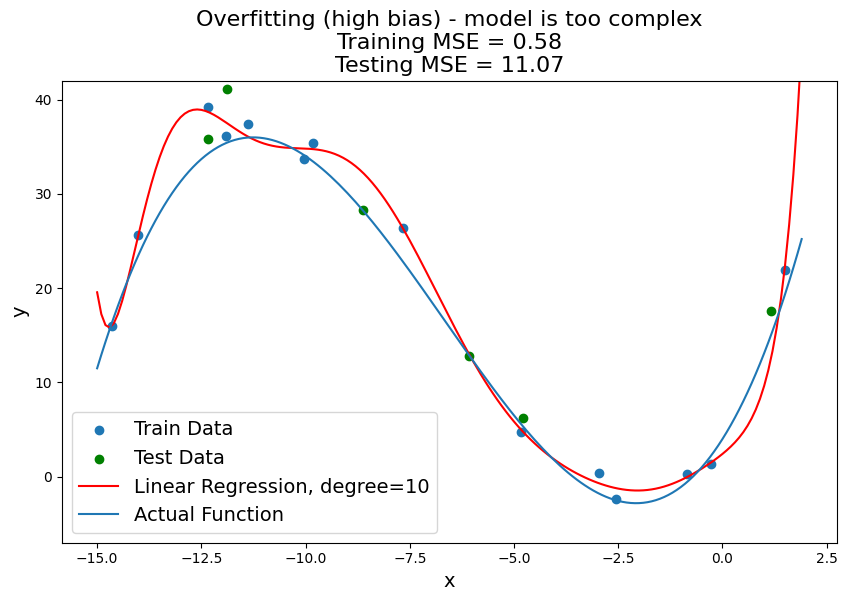

In [9]:
simple_degree = 10 

simple_model = polynomial_regression(degree=simple_degree)
simple_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                simple_model,
                model_label=f"Linear Regression, degree={simple_degree}",
                title='Overfitting (high bias) - model is too complex')

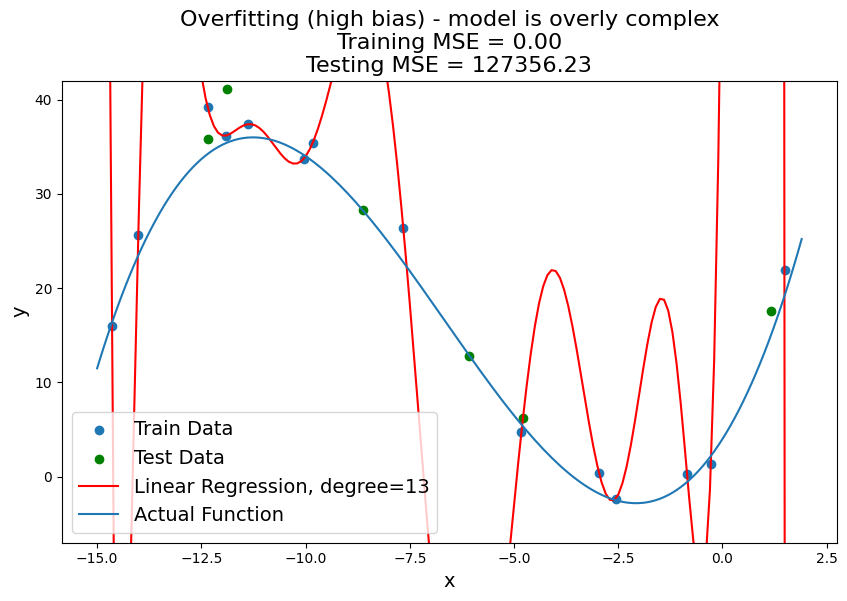

In [10]:
simple_degree = 13

simple_model = polynomial_regression(degree=simple_degree)
simple_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                simple_model,
                model_label=f"Linear Regression, degree={simple_degree}",
                title='Overfitting (high bias) - model is overly complex')

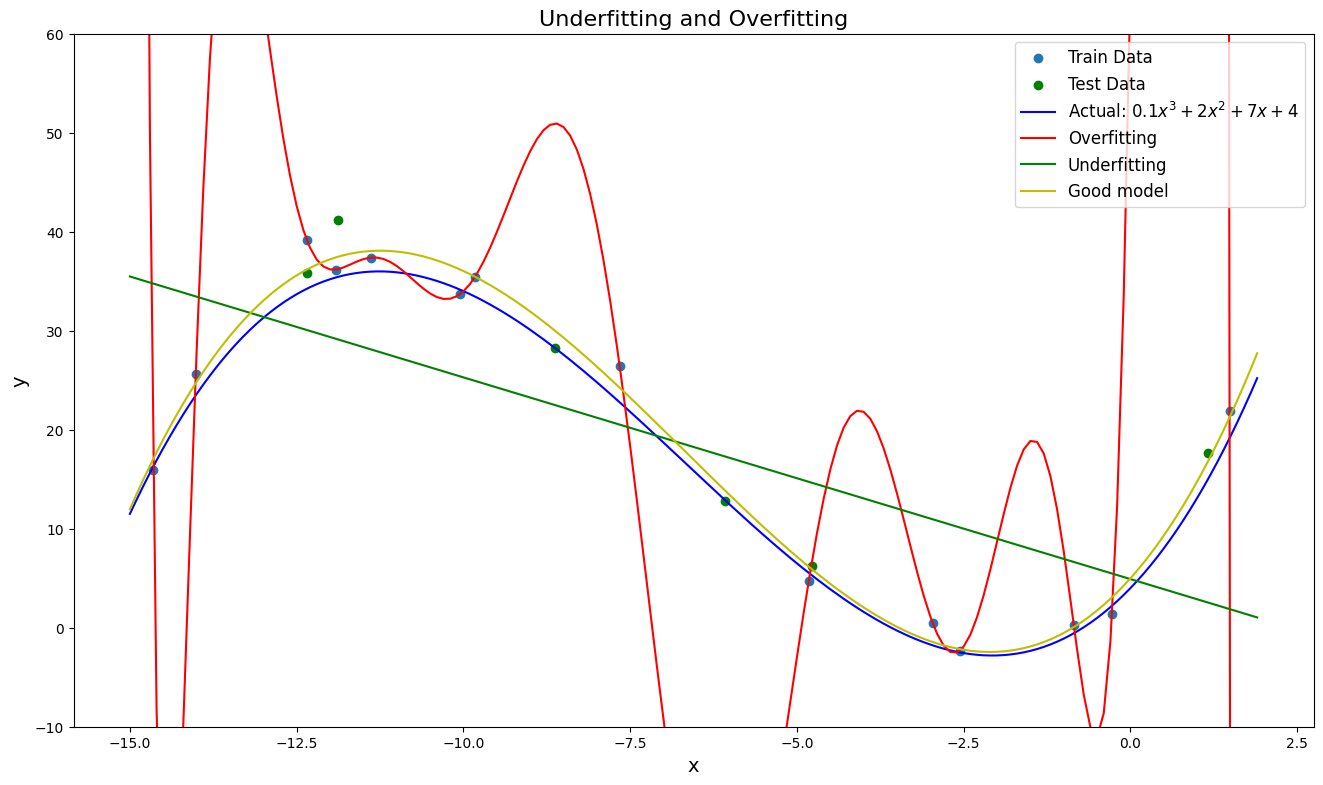

In [11]:
x, y = generate_dataset(x_min, x_max, size=20)
x_true = np.arange(x_min, x_max, step=0.1)
y_true = np.array([function(xi) for xi in x_true])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

# Complex model
complex_degree = 13

complex_model = polynomial_regression(degree=complex_degree)
complex_model.fit(x_train[:, np.newaxis], y_train)

y_pred_complex = complex_model.predict(x_true.reshape(-1, 1))


# Simple model

simple_degree = 1

simple_model = polynomial_regression(degree=simple_degree)
simple_model.fit(x_train[:, np.newaxis], y_train)

y_pred_simple = simple_model.predict(x_true.reshape(-1, 1))


# Good model
good_degree = 3

good_model = polynomial_regression(degree=good_degree)
good_model.fit(x_train[:, np.newaxis], y_train)

y_pred_good = good_model.predict(x_true.reshape(-1, 1))

plt.figure(figsize=(16, 9))
# Plot train, test data
plt.scatter(x_train, y_train, label="Train Data")
plt.scatter(x_test, y_test, color='g', label="Test Data")

# Plot actual funtion

plt.plot(x_true, y_true, label="Actual: $0.1x^3 + 2x^2 + 7x + 4$", color="b")

# Plot simple model
plt.plot(x_true,y_pred_complex, label="Overfitting", color="r")

plt.plot(x_true,y_pred_simple, label="Underfitting", color="g")

plt.plot(x_true,y_pred_good, label="Good model", color="y")


plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.ylim(-10,60)
plt.legend(loc='best', fontsize=12)


plt.title("Underfitting and Overfitting", fontsize=16)
plt.savefig("under_over_bia_varian.jpg")
plt.show()

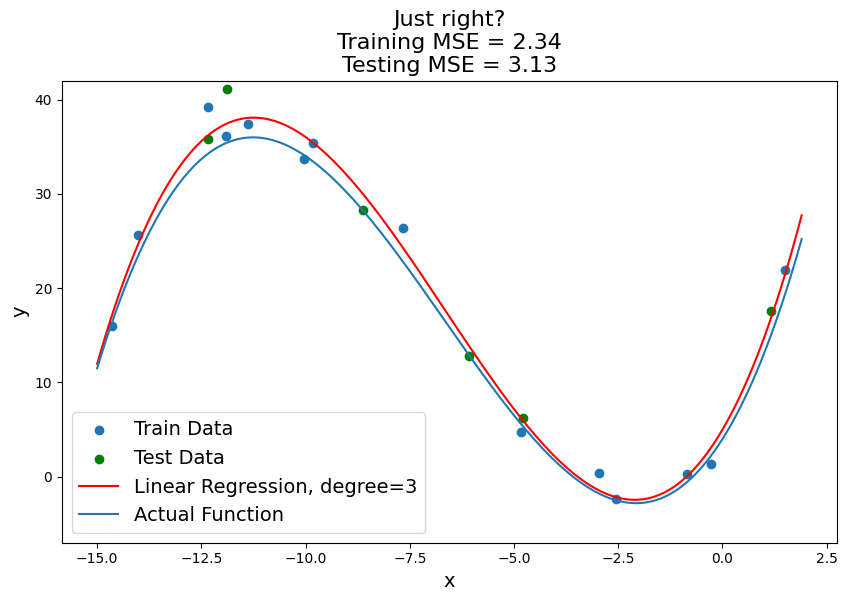

In [12]:
simple_degree = 3

simple_model = polynomial_regression(degree=simple_degree)
simple_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                simple_model,
                model_label=f"Linear Regression, degree={simple_degree}",
                title='Just right?')

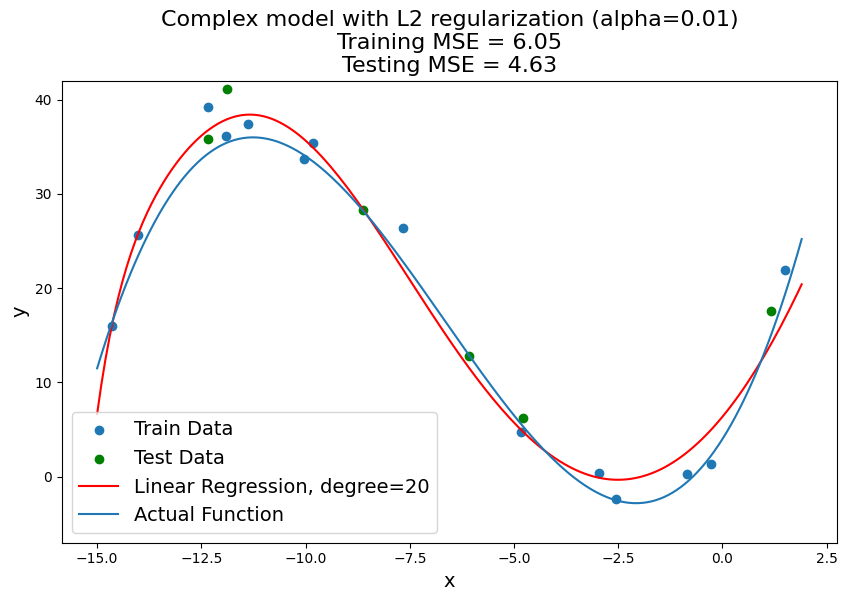

In [13]:
alpha = 0.01
complex_degree=20

regularized_model = polynomial_Ridge_regression(degree=complex_degree,
                                                alpha=alpha)
#given that Ridge(alpha) with the point of extracting all of the other points that
#is "out of the trend" the smaller the alpha, the lesser the "strange" points, but
#this could lead to underfitting if it is not well trained
regularized_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                regularized_model,
                model_label=f"Linear Regression, degree={complex_degree}",
                title=f'Complex model with L2 regularization (alpha={alpha})')

#in this case, will

c:\Users\bendy\Documents\Project\Quantitative_Finance_Self_Learning\quant_venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+01, tolerance: 3.300e-01
  model = cd_fast.enet_coordinate_descent(


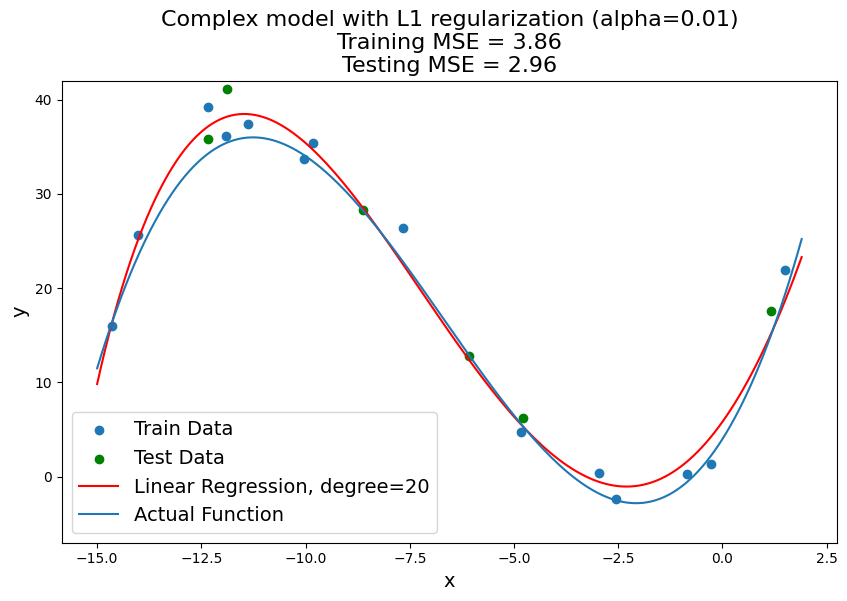

In [14]:
alpha = 0.01
complex_degree=20

regularized_model = polynomial_Lasso_regression(degree=complex_degree,
                                                alpha=alpha)
#given that Ridge(alpha) with the point of extracting all of the other points that
#is "out of the trend" the smaller the alpha, the lesser the "strange" points, but
#this could lead to underfitting if it is not well trained
regularized_model.fit(x_train[:, np.newaxis], y_train)

plot_regression(x_train, y_train,
                x_test, y_test,
                x_true, y_true,
                regularized_model,
                model_label=f"Linear Regression, degree={complex_degree}",
                title=f'Complex model with L1 regularization (alpha={alpha})')

#in this case, will

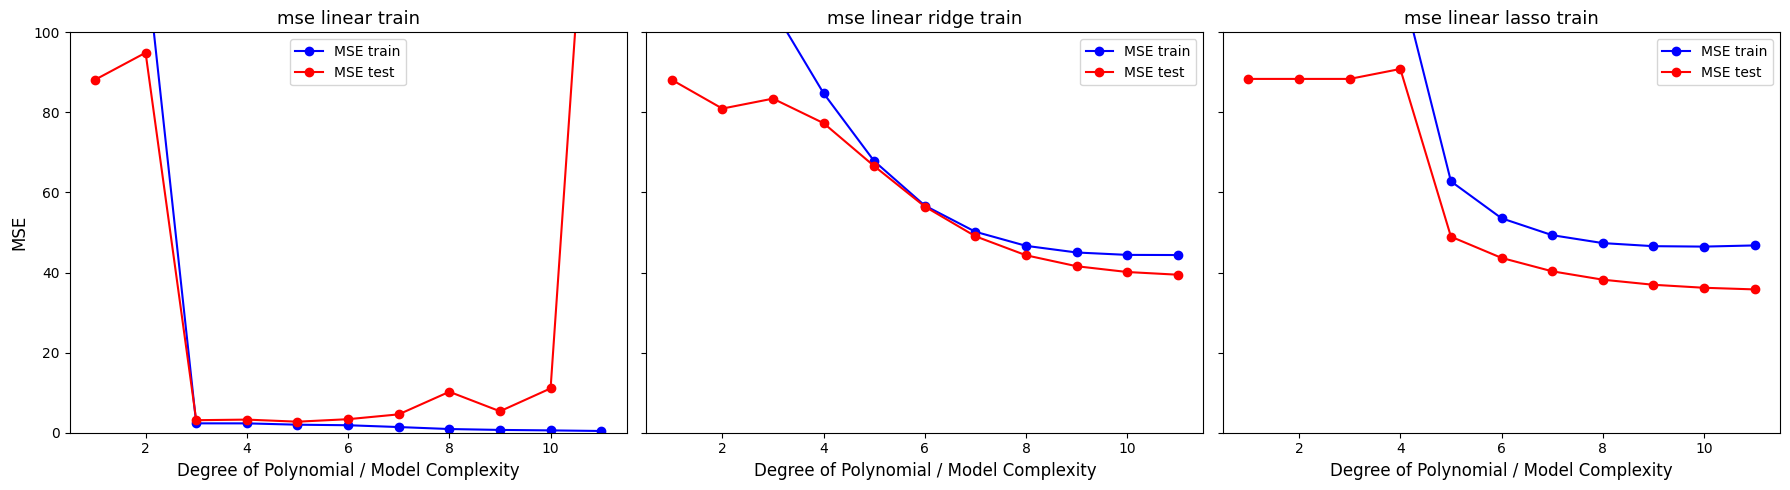

In [15]:
degrees = range(1, 12)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

mse_list_train = {}
mse_list_test = {}
mse_list_train["mse_linear_train"] = []
mse_list_test["mse_linear_test"] = []
for degree in degrees:
    current_model = polynomial_regression(degree=degree) 
    current_model.fit(x_train[:, np.newaxis], y_train)
    mse_train, mse_test = train_test_mse(x_train, y_train,
                                         x_test, y_test,
                                         current_model) 
    mse_list_train["mse_linear_train"].append(mse_train)
    mse_list_test["mse_linear_test"].append(mse_test)
    
mse_list_train["mse_linear_ridge_train"] = []
mse_list_test["mse_linear_ridge_test"] = []
for degree in degrees:
    current_model = polynomial_Ridge_regression(degree=degree)
    current_model.fit(x_train[:, np.newaxis], y_train)
    mse_train, mse_test = train_test_mse(x_train, y_train,
                                         x_test, y_test,
                                         current_model) 
    mse_list_train["mse_linear_ridge_train"].append(mse_train)
    mse_list_test["mse_linear_ridge_test"].append(mse_test)
    
mse_list_train["mse_linear_lasso_train"] = []
mse_list_test["mse_linear_lasso_test"] = []
for degree in degrees:
    current_model = polynomial_Lasso_regression(degree=degree) #this is basically
    current_model.fit(x_train[:, np.newaxis], y_train)
    mse_train, mse_test = train_test_mse(x_train, y_train,
                                         x_test, y_test,
                                         current_model) 
    mse_list_train["mse_linear_lasso_train"].append(mse_train)
    mse_list_test["mse_linear_lasso_test"].append(mse_test)

for ax, (key_train, key_test) in zip(
        axes,
        zip(list(mse_list_train.keys()), list(mse_list_test.keys()))
    ):

    ax.plot(degrees, mse_list_train[key_train], 'bo-', label='MSE train')
    ax.plot(degrees, mse_list_test[key_test], 'ro-', label='MSE test')

    ax.set_xlabel("Degree of Polynomial / Model Complexity", fontsize=12)
    ax.set_title(key_train.replace("_", " "), fontsize=13)
    ax.set_ylim(0, 100)
    ax.legend(loc='best')

axes[0].set_ylabel("MSE", fontsize=12)

plt.tight_layout()
plt.show()